<a href="https://colab.research.google.com/github/AndreaCedenoR/Regresion-lineal/blob/main/IAAA_P2_Cede%C3%B1oReis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploades = files.upload()
data = pd.read_csv("Fish.csv")
# Cargue y grafique el conjunto de datos ”Fish”.
data.info()

Saving Fish.csv to Fish (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


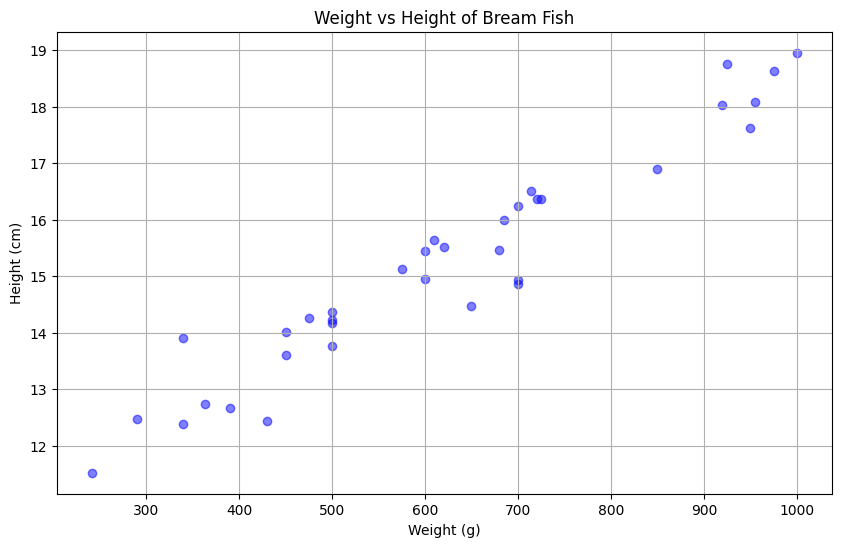

In [ ]:
# Seleccione las caracter´ısticas: ”Weight” y ”Height”, de la especie ”Bream”.
bream_data = data[data['Species'] == 'Bream']

weight = bream_data['Weight']
height = bream_data['Height']

# Graficar Weight vs Height
plt.figure(figsize=(10, 6))
plt.scatter(weight, height, color='blue', alpha=0.5)
plt.title('Weight vs Height of Bream Fish')
plt.xlabel('Weight (g)')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.show()

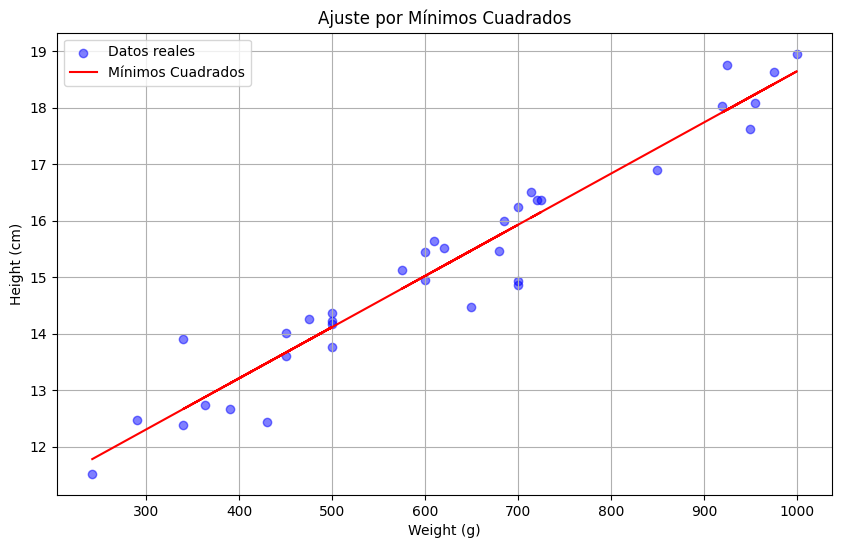

In [ ]:
# Función para calcular los coeficientes por mínimos cuadrados
def linear_regression_ls(x, y):
    n = len(x)
    sum_x = sum(x)              # Suma de todos los valores de x
    sum_y = sum(y)              # Suma de todos los valores de y
    sum_xy = sum(x * y)         # Suma de la multiplicación de x por y
    sum_x2 = sum(x ** 2)        # Suma de x al cuadrado

    # Calcula los coeficientes de la recta (pendiente e intercepto)
    pendiente = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    intercepto = (sum_y - pendiente * sum_x) / n

    # Devolver los coeficientes
    return intercepto, pendiente

# Obtener los coeficientes
x = weight.values
y = height.values
beta_ls = linear_regression_ls(x, y)

# Generar predicciones
y_pred_ls = beta_ls[0] + beta_ls[1] * x

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Datos reales')
plt.plot(x, y_pred_ls, color='red', label='Mínimos Cuadrados')
plt.title('Ajuste por Mínimos Cuadrados')
plt.xlabel('Weight (g)')
plt.ylabel('Height (cm)')
plt.legend()
plt.grid(True)
plt.show()


El modelo lineal busca una relación de la forma:
y^=mx+b


In [ ]:
# Función de descenso de gradiente con el parámetro de aprendizaje ajustable
def gradient_descent(x, y, learning_rate, epochs=500):
    m, b = 0, 0  # Inicializar parámetros
    n = len(x)
    for _ in range(epochs):
        y_pred = m * x + b
        error = y - y_pred
        m_grad = -(2/n) * sum(x * error)  # Gradiente para la pendiente
        b_grad = -(2/n) * sum(error)      # Gradiente para el intercepto
        m -= learning_rate * m_grad
        b -= learning_rate * b_grad
    return m, b

# Función para calcular MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(weight.values, height.values, test_size=0.2, random_state=42)

# Búsqueda del mejor parámetro de aprendizaje
learning_rates = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]  # Rango de tasas de aprendizaje
errors = []

for lr in learning_rates:
    m, b = gradient_descent(x_train, y_train, learning_rate=lr, epochs=500)
    y_pred_val = m * x_val + b
    error = mse(y_val, y_pred_val)
    errors.append(error)
    print(f"Tasa de aprendizaje: {lr}, MSE en validación: {error}")

# Encontrar el mejor learning_rate
best_lr = learning_rates[np.argmin(errors)]
print(f"\nMejor tasa de aprendizaje: {best_lr}")

Tasa de aprendizaje: 1e-10, MSE en validación: 235.56177147628208
Tasa de aprendizaje: 1e-09, MSE en validación: 114.68843410612057
Tasa de aprendizaje: 1e-08, MSE en validación: 8.016649606457978
Tasa de aprendizaje: 1e-07, MSE en validación: 8.121843499096558
Tasa de aprendizaje: 1e-06, MSE en validación: 8.120491158522835

Mejor tasa de aprendizaje: 1e-08


In [ ]:
# División de datos en entrenamiento y validación
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y conjunto de validación
x_train, x_val, y_train, y_val = train_test_split(weight.values, height.values, test_size=0.2, random_state=42)

# Entrenar el modelo usando descenso de gradiente
def gradient_descent(x, y, learning_rate, epochs=500):
    m, b = 0, 0  # Inicializar parámetros
    n = len(x)
    for _ in range(epochs):
        y_pred = m * x + b
        error = y - y_pred
        m_grad = -(2/n) * sum(x * error)  # Gradiente para la pendiente
        b_grad = -(2/n) * sum(error)      # Gradiente para el intercepto
        m -= learning_rate * m_grad
        b -= learning_rate * b_grad
    return m, b

# Usar el mejor learning_rate encontrado en tu búsqueda previa
learning_rate = 1e-06  # Sustituye esto por el mejor valor encontrado
m, b = gradient_descent(x_train, y_train, learning_rate, epochs=500)

# Generar predicciones en el conjunto de validación
y_pred_val = m * x_val + b

# Calcular el error cuadrático medio (MSE) en el conjunto de validación
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse_val = mse(y_val, y_pred_val)

# Imprimir el desempeño del modelo
print(f"Error cuadrático medio (MSE) en el conjunto de validación: {mse_val}")

Error cuadrático medio (MSE) en el conjunto de validación: 8.120491158522835


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Entrenar el modelo con Scikit-learn
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train)  # Ajustar el modelo a los datos de entrenamiento

# Generar predicciones con el conjunto de validación
y_pred_sklearn = model.predict(x_val.reshape(-1, 1))

# Calcular el MSE para Scikit-learn
mse_sklearn = mean_squared_error(y_val, y_pred_sklearn)

# Comparar MSE de ambos modelos
print(f"Error cuadrático medio (MSE) - Descenso de Gradiente: {mse_val}")
print(f"Error cuadrático medio (MSE) - LinearRegression de Scikit-learn: {mse_sklearn}")


Error cuadrático medio (MSE) - Descenso de Gradiente: 8.120491158522835
Error cuadrático medio (MSE) - LinearRegression de Scikit-learn: 0.474384216263332
